-------------------------------------

In [234]:
#!pip install apimoex

In [230]:
import requests
import numpy as np
import apimoex
import pandas as pd

stock_quotes = ['GAZP', 'YNDX', 'RUAL', 'IRAO', 'FIVE', 'GMKN', 'LKOH', 'MGNT', 'MTSS', 'NLMK', 'NVTK', 'PLZL', 'ROSN', 'SBER',
               'SNGS', 'TATN']
for elem in stock_quotes:
    with requests.Session() as session:
        if elem == 'GAZP':
            data = apimoex.get_board_history(session, elem)
            df = pd.DataFrame(data)
            df.rename(columns = {'CLOSE':elem}, inplace = True)
            df = df[['TRADEDATE', elem]]
        else:
            data = apimoex.get_board_history(session, elem)
            df_2 = pd.DataFrame(data)
            df_2.rename(columns = {'CLOSE':elem}, inplace = True)
            df_2 = df_2[elem]
            df = pd.concat([df, df_2], axis=1)


In [232]:
#df.set_index('TRADEDATE', inplace=True)
df = df.dropna()
df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'])
df['time_delta'] = df['TRADEDATE'].diff()
df

,TRADEDATE,GAZP,YNDX,RUAL,IRAO,FIVE,GMKN,LKOH,MGNT,MTSS,NLMK,NVTK,PLZL,ROSN,SBER,SNGS,TATN,time_delta
64,2014-09-09,139.02,1119.0,27.180,0.010500,1835.0,7393.0,1865.0,8400.1,327.92,54.550,311.50,499.4,234.55,92.67,26.811,211.25,1 days
80,2014-10-01,137.26,1162.0,29.300,0.009598,1840.0,7260.0,1998.5,8510.7,337.80,57.820,365.01,492.5,230.00,98.47,26.055,216.49,1 days
111,2014-11-14,142.49,1221.0,30.300,0.008604,1715.5,8152.0,1924.2,9100.1,322.47,59.355,361.02,473.5,233.79,88.15,28.950,203.50,1 days
113,2014-11-18,143.20,1230.0,30.200,0.008644,1758.0,8395.0,1942.5,9066.2,319.51,60.375,369.33,482.0,235.70,90.45,29.165,201.34,1 days
114,2014-11-19,143.98,1224.0,31.380,0.009316,1760.0,8483.0,1929.9,9138.5,320.49,61.500,373.09,529.0,235.00,90.33,29.885,203.22,1 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2020-03-20,176.26,2425.0,38.030,3.898500,2277.0,16358.0,5074.5,3595.0,259.00,111.560,1138.80,8495.5,287.75,190.99,26.860,749.20,1 days
1458,2020-03-24,177.95,2434.0,38.530,3.900000,2339.5,19028.0,5060.0,3578.5,261.25,116.080,1121.00,9520.5,298.50,197.00,28.250,752.00,1 days
1459,2020-03-25,180.20,2455.2,37.830,3.842000,2307.5,19930.0,5152.0,3675.0,260.00,122.120,1132.50,9995.0,304.75,196.75,29.665,750.20,1 days
1460,2020-03-26,181.50,2299.8,38.145,3.789500,2310.0,20100.0,5200.0,3639.5,258.80,119.760,1129.40,11047.5,316.20,196.80,32.250,743.50,1 days


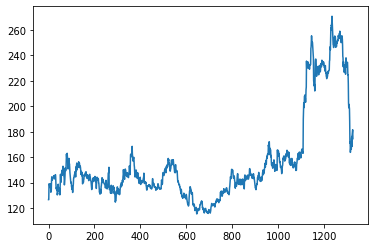

In [236]:
plt.plot(list(df['GAZP']))